In [18]:
import os
import pickle
import random
from collections import Counter

import anndata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

In [4]:
import scanpy as sc

In [2]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)

# Load data

In [3]:
path = "/home/sr2464/scratch/C2S_Files/CellOT_files/pancreas_data/harmony_common_pancreas.h5ad"
adata = anndata.read_h5ad(path)
adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
mpl.rcParams['figure.facecolor'] = 'white'

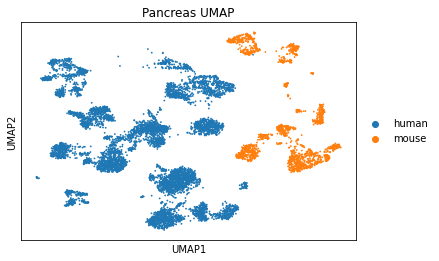

In [9]:
sc.pl.umap(
    adata,
    color="species_label",
    use_raw=False,
    layer="X_umap",
    title="Pancreas UMAP"
)

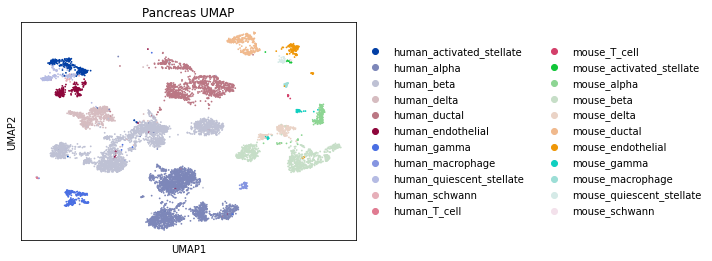

In [10]:
sc.pl.umap(
    adata,
    color="species_cell_type_label",
    use_raw=False,
    layer="X_umap",
    title="Pancreas UMAP"
)

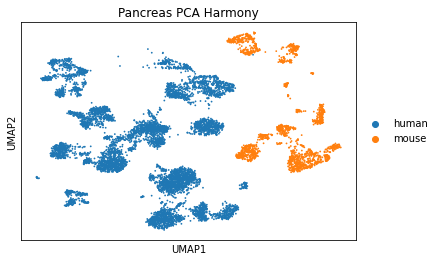

In [11]:
sc.pl.umap(
    adata,
    color="species_label",
    use_raw=False,
    layer="X_pca_harmony_library",
    title="Pancreas PCA Harmony"
)

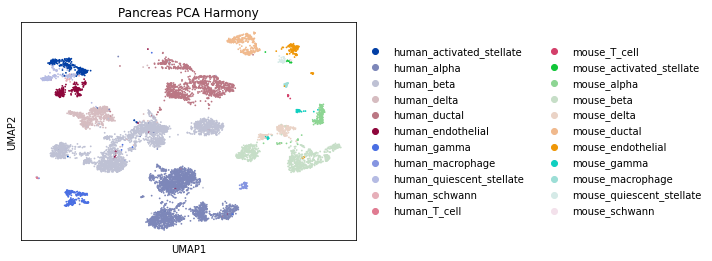

In [12]:
sc.pl.umap(
    adata,
    color="species_cell_type_label",
    use_raw=False,
    layer="X_pca_harmony_library",
    title="Pancreas PCA Harmony"
)

In [15]:
adata.obsm["X_pca_harmony_library"][:5, :5]

array([[ 4.86918897, -4.24895634, -0.85494877,  1.52120728, -1.51291382],
       [ 2.52879507, -1.27629558,  0.12428052, -2.14126859,  0.47549476],
       [ 0.67772657,  1.0425095 , -0.33542794, -3.17698141, -0.89548378],
       [ 4.08769061, -4.58518686, -0.65771514,  0.11044979, -0.3882161 ],
       [-9.54956369, -4.66992219, 10.56169994,  0.98726691, -1.6254936 ]])

In [16]:
adata.obsm["X_umap"][:5, :5]

array([[-3.1589208 , -0.64598614],
       [-4.5681753 ,  5.677734  ],
       [-5.20863   ,  5.449154  ],
       [-3.1751363 ,  0.8445571 ],
       [-6.919927  , 11.617758  ]], dtype=float32)

In [17]:
print(adata.obsm["X_pca_harmony_library"].shape)
print(adata.obsm["X_umap"].shape)

(9436, 50)
(9436, 2)


In [19]:
Counter(adata.obs["species_label"])

Counter({'human': 7568, 'mouse': 1868})

In [20]:
adata.X

<9436x12113 sparse matrix of type '<class 'numpy.float32'>'
	with 15443599 stored elements in Compressed Sparse Row format>

In [21]:
adata.obs.head()

,cell_barcodes,cell_manual_ids,cell_types,batch_sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,species_cell_type_label,species_label
human1_lib1.final_cell_0007,AAAATCGTT-CTCCGCAT,human1_lib1.final_cell_0007,beta,GSM2230757_human1_umifm_counts,3843,3843,14947.0,0.0,0.0,human_beta,human
human1_lib1.final_cell_0013,AAAATCGTT-GGAAACAG,human1_lib1.final_cell_0013,delta,GSM2230757_human1_umifm_counts,2357,2357,8338.0,0.0,0.0,human_delta,human
human1_lib1.final_cell_0014,GATTGAGGGT-CTGGTGCA,human1_lib1.final_cell_0014,delta,GSM2230757_human1_umifm_counts,2191,2191,8155.0,0.0,0.0,human_delta,human
human1_lib1.final_cell_0015,AAAGTAATC-TCGGTTCG,human1_lib1.final_cell_0015,beta,GSM2230757_human1_umifm_counts,3547,3547,13633.0,0.0,0.0,human_beta,human
human1_lib1.final_cell_0016,AAATGAATG-ACGGTAGC,human1_lib1.final_cell_0016,activated_stellate,GSM2230757_human1_umifm_counts,3585,3584,13091.0,0.0,0.0,human_activated_stellate,human


In [22]:
adata.var.head()

,homolog_pair_idx,human_gene_name,mouse_gene_name,human_gene_ensembl_id,mouse_gene_ensembl_id,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
homolog_pair_0,homolog_pair_0,EIF1AY,EIF1A,ENSG00000198692,ENSMUSG00000057561,False,0.206266,0.237153,-0.814190,0,False
homolog_pair_1,homolog_pair_1,COLEC12,COLEC12,ENSG00000158270,ENSMUSG00000036103,False,0.002203,0.255495,-0.376221,1,False
homolog_pair_2,homolog_pair_2,IMPA2,IMPA2,ENSG00000141401,ENSMUSG00000024525,True,0.256580,0.891616,0.724113,4,False
homolog_pair_3,homolog_pair_3,RAB31,RAB31,ENSG00000168461,ENSMUSG00000056515,True,0.262541,1.046294,1.093602,5,False
homolog_pair_4,homolog_pair_4,MED15,MED15,ENSG00000099917,ENSMUSG00000012114,False,0.193046,0.342892,-0.372020,0,False
